In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.impute import KNNImputer
from pycaret.regression import *
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the covid vaccination dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/country_vaccinations.csv")

shape of dataset

In [ ]:
print(data.shape)
data.head()

(86512, 15)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


Preprocessing the dataset

Handle the null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
print(data.isnull().sum())

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


Null value count are half of data so rather than impute just drop it

In [ ]:
data.dropna(axis=0,inplace=True)
data.shape

(30847, 15)

Outlierhandling


Finding outlier

In [ ]:
list1=['total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred','daily_vaccinations_per_million']

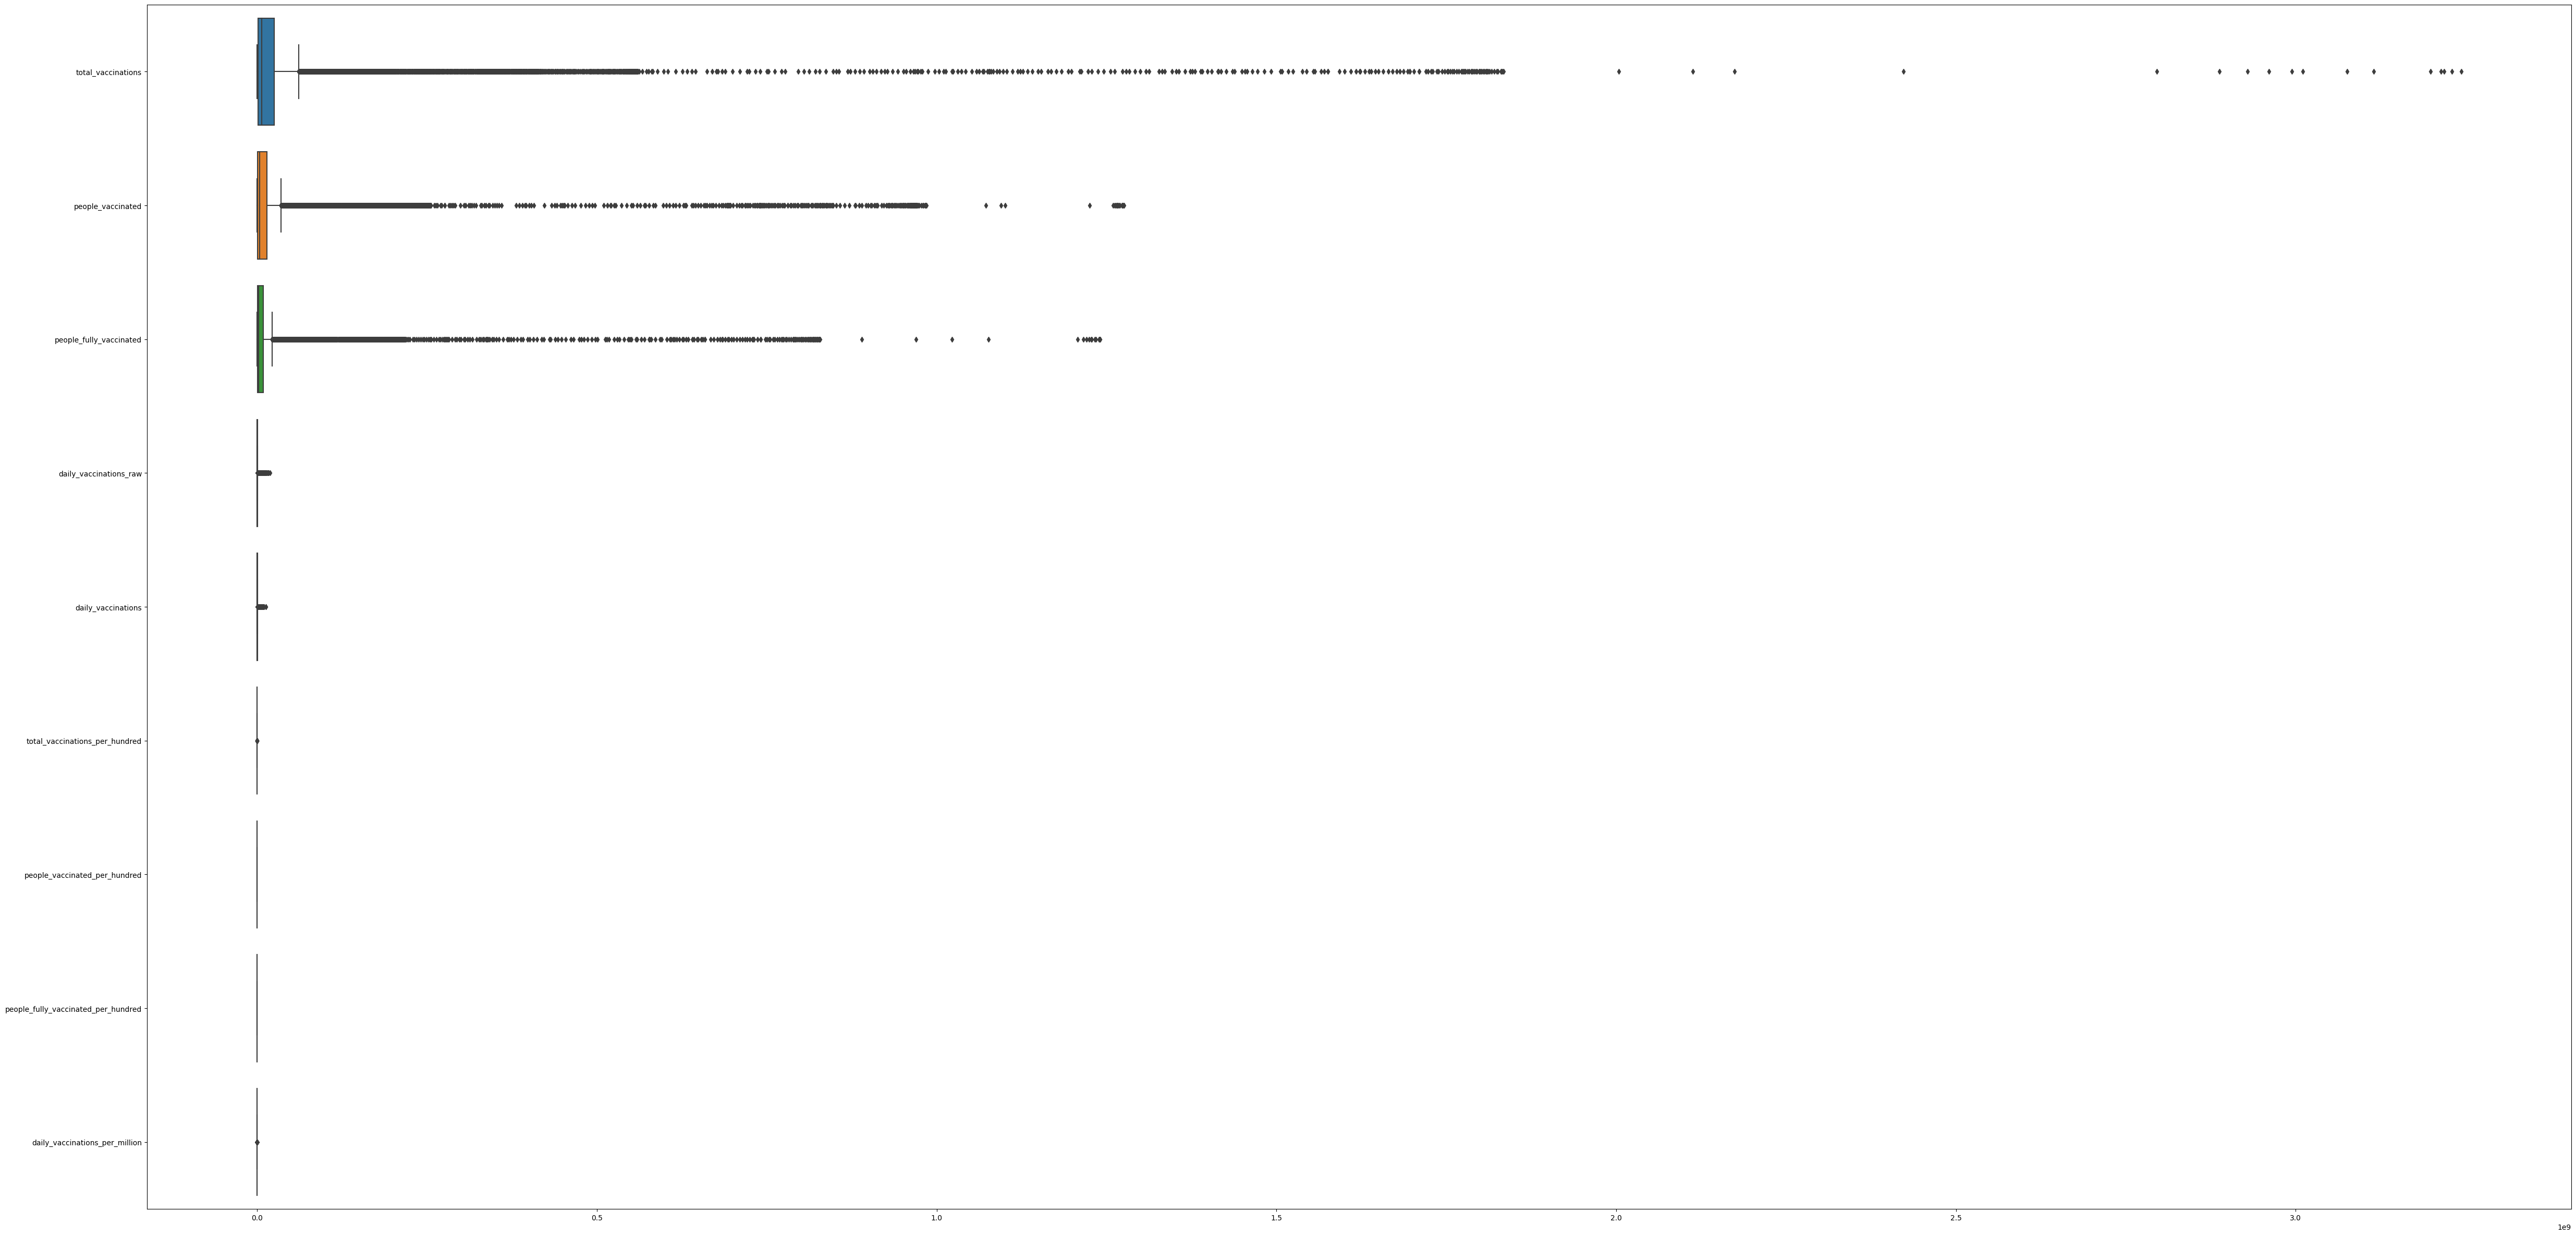

Outlier on  total_vaccinations    is 4407
                   
Outlier on  people_vaccinated    is 4384
                   
Outlier on  people_fully_vaccinated    is 4826
                   
Outlier on  daily_vaccinations_raw    is 4091
                   
Outlier on  daily_vaccinations    is 4004
                   
Outlier on  total_vaccinations_per_hundred    is 26
                   
Outlier on  daily_vaccinations_per_million    is 769
                   


In [ ]:
plt.figure(figsize=(60,30))
sns.boxplot(data,orient='h')
plt.show()

for c in list1:
  col=data[c]
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  iqr=q3-q1
  lower=q1 - 1.5 *iqr
  upper=q3 + 1.5*iqr
  length=len(col[(col<lower) | (col>upper)])
  print(f"Outlier on  {c}    is {length}")
  print("                   ")


In [ ]:
for c in list1:
  col=data[c]
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  iqr=q3-q1
  lower=q1 - 1.5 *iqr
  upper=q3 + 1.5*iqr
  col[col<lower]=lower
  col[col>upper]=upper
  print(" outlier handling completed")

 outlier handling completed
 outlier handling completed
 outlier handling completed
 outlier handling completed
 outlier handling completed
 outlier handling completed
 outlier handling completed


After handling the outliers both dataset boxplot

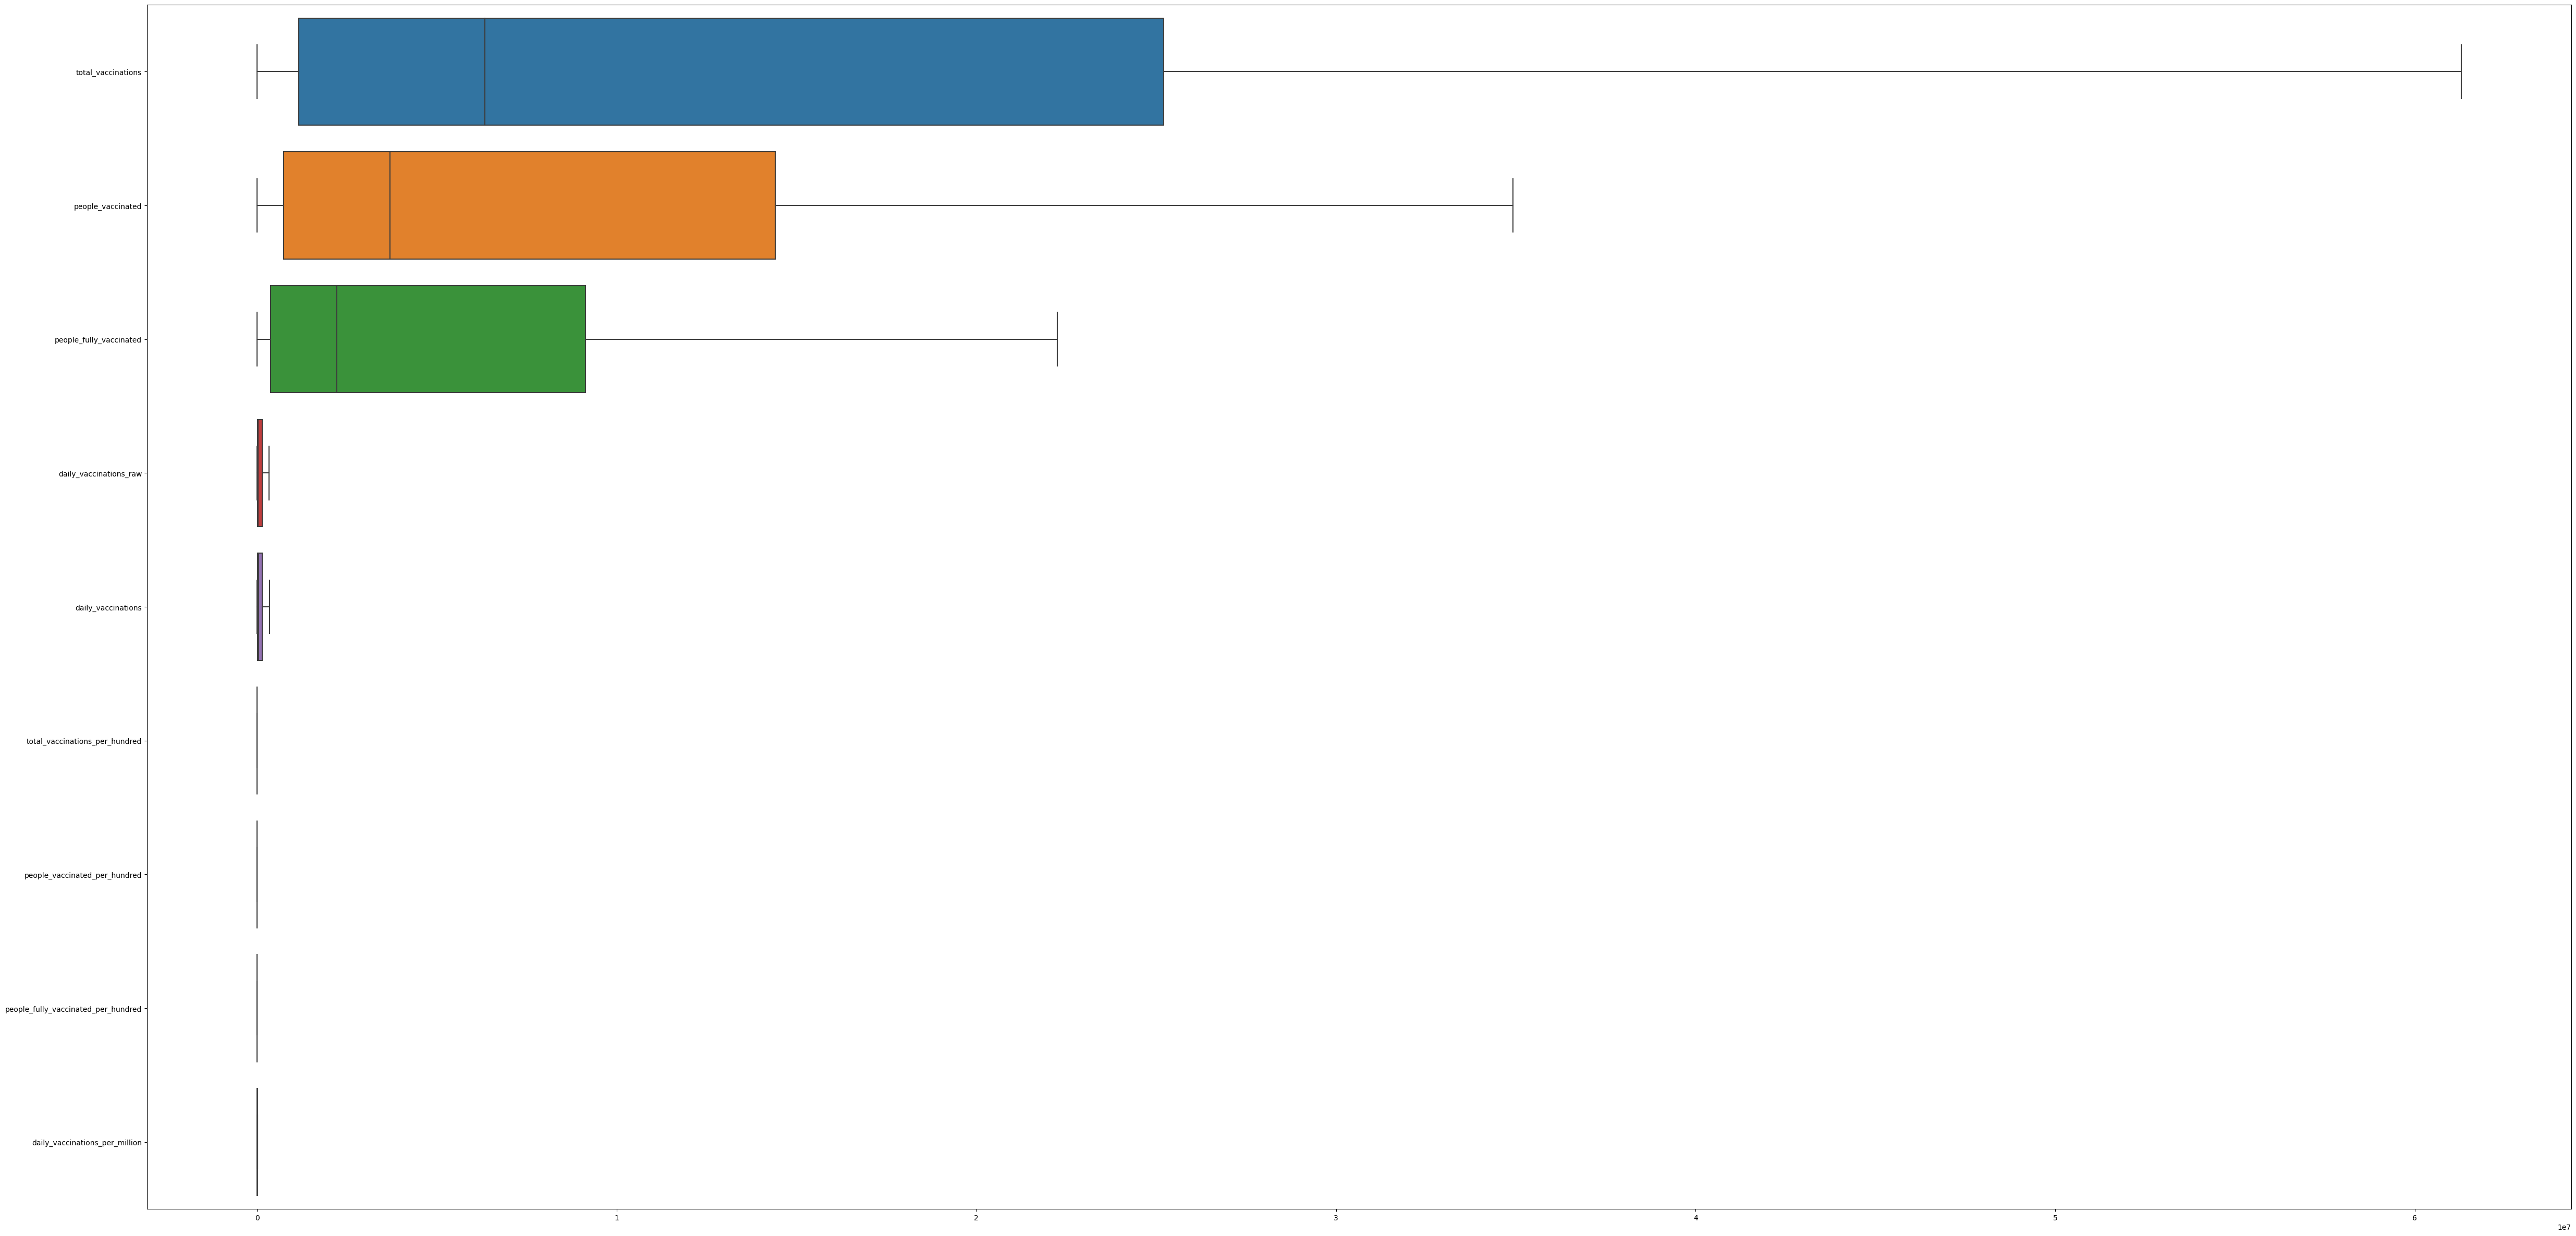

In [ ]:
plt.figure(figsize=(60,30))
sns.boxplot(data,orient='h')
plt.show()

Statiscal analysis

In [ ]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.084700e+04,3.084700e+04,3.084700e+04,30847.000000,30847.000000,30847.000000,30847.000000,30847.000000,30847.000000
mean,1.705935e+07,9.587147e+06,6.369341e+06,89622.957759,93837.217071,88.595403,44.793028,36.563440,4144.458635
std,2.187500e+07,1.237931e+07,8.118668e+06,116020.390309,119257.938525,67.444199,28.464379,28.532602,3217.135674
min,3.000000e+00,3.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.153332e+06,7.339795e+05,3.704450e+05,5498.000000,7329.500000,25.475000,17.190000,7.400000,1567.500000
50%,6.335305e+06,3.688092e+06,2.211035e+06,29081.000000,32472.000000,81.470000,48.160000,34.110000,3254.000000
75%,2.520629e+07,1.440668e+07,9.121526e+06,134458.000000,140291.500000,140.745000,70.330000,63.570000,6069.500000
max,6.128573e+07,3.491573e+07,2.224815e+07,327898.000000,339734.500000,313.650000,124.760000,122.370000,12822.500000


Perform the EDA on the data

Number of Countries that are present in dataset

In [ ]:
len(data["country"].unique())

169

Distribution of the total vacccination

<Axes: xlabel='total_vaccinations', ylabel='Count'>

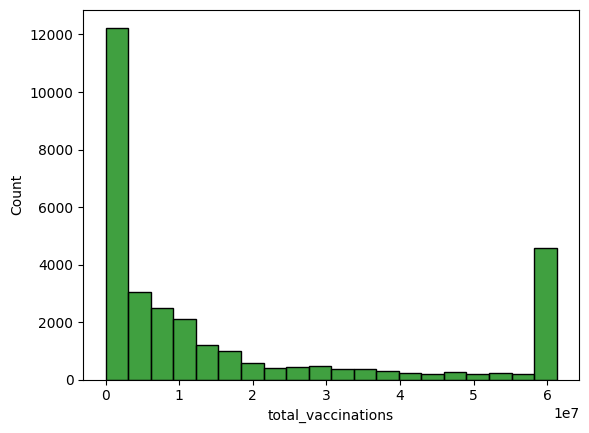

In [ ]:
sns.histplot(data=data["total_vaccinations"],bins=20,color= 'g')

Find the correlted columns

<Axes: >

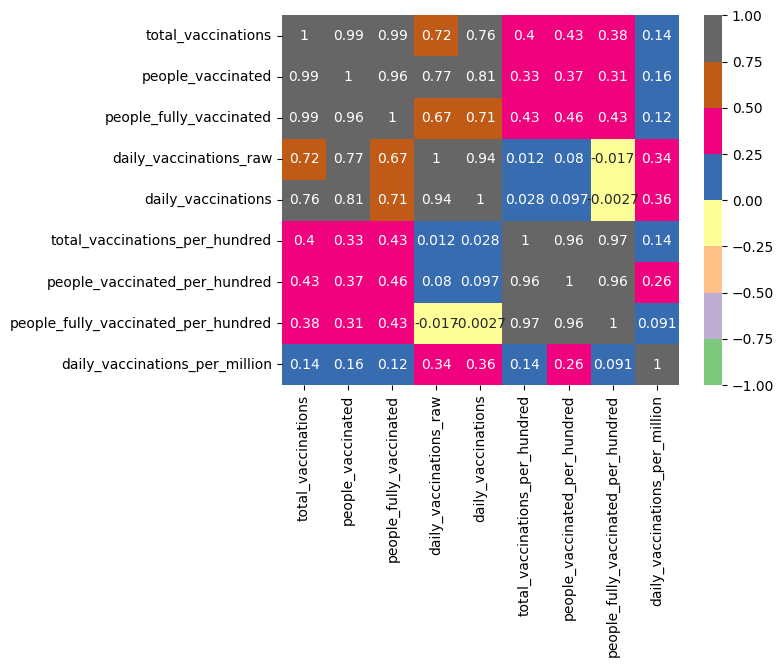

In [ ]:
sns.heatmap(data.corr(),cmap="Accent",annot=True,vmin=-1,vmax=1,center=0)

calculate the tottal vaccination,people full vaccinated and people vaccinated total in country wise

In [ ]:
total_vac1=[]
for x in data["country"].unique():
     z=data.loc[data["country"]== x]
     total=0
     total=z["total_vaccinations"].sum()
     total_vac1.append(total)
total_vac2=[]
for x in data["country"].unique():
     z=data.loc[data["country"]== x]
     total=0
     total=z["people_vaccinated"].sum()
     total_vac2.append(total)
total_vac3=[]
for x in data["country"].unique():
     z=data.loc[data["country"]== x]
     total=0
     total=z["people_fully_vaccinated"].sum()
     total_vac3.append(total)

Create dataframe for country wise vaccination distibution

In [ ]:
datafre={"country":data['country'].unique(),"total_vaccinations":total_vac1,"People_Vaccinated":total_vac2,"people_Fully_vaccinated":total_vac3}
new_data=pd.DataFrame(datafre)
new_data

,country,total_vaccinations,People_Vaccinated,people_Fully_vaccinated
0,Afghanistan,6.304682e+06,5.478754e+06,4.131076e+06
1,Albania,1.748274e+08,9.592519e+07,7.658774e+07
2,Algeria,2.432556e+07,1.357837e+07,1.070525e+07
3,Andorra,1.526900e+04,9.781000e+03,4.484000e+03
4,Antigua and Barbuda,6.160890e+05,3.551400e+05,2.609490e+05
...,...,...,...,...
164,Uzbekistan,2.648153e+08,1.442560e+08,6.025293e+07
165,Vietnam,3.551691e+09,2.521270e+09,8.917782e+08
166,Wales,1.805534e+09,8.840849e+08,6.909660e+08
167,Zambia,1.662901e+07,1.146332e+07,5.165692e+06


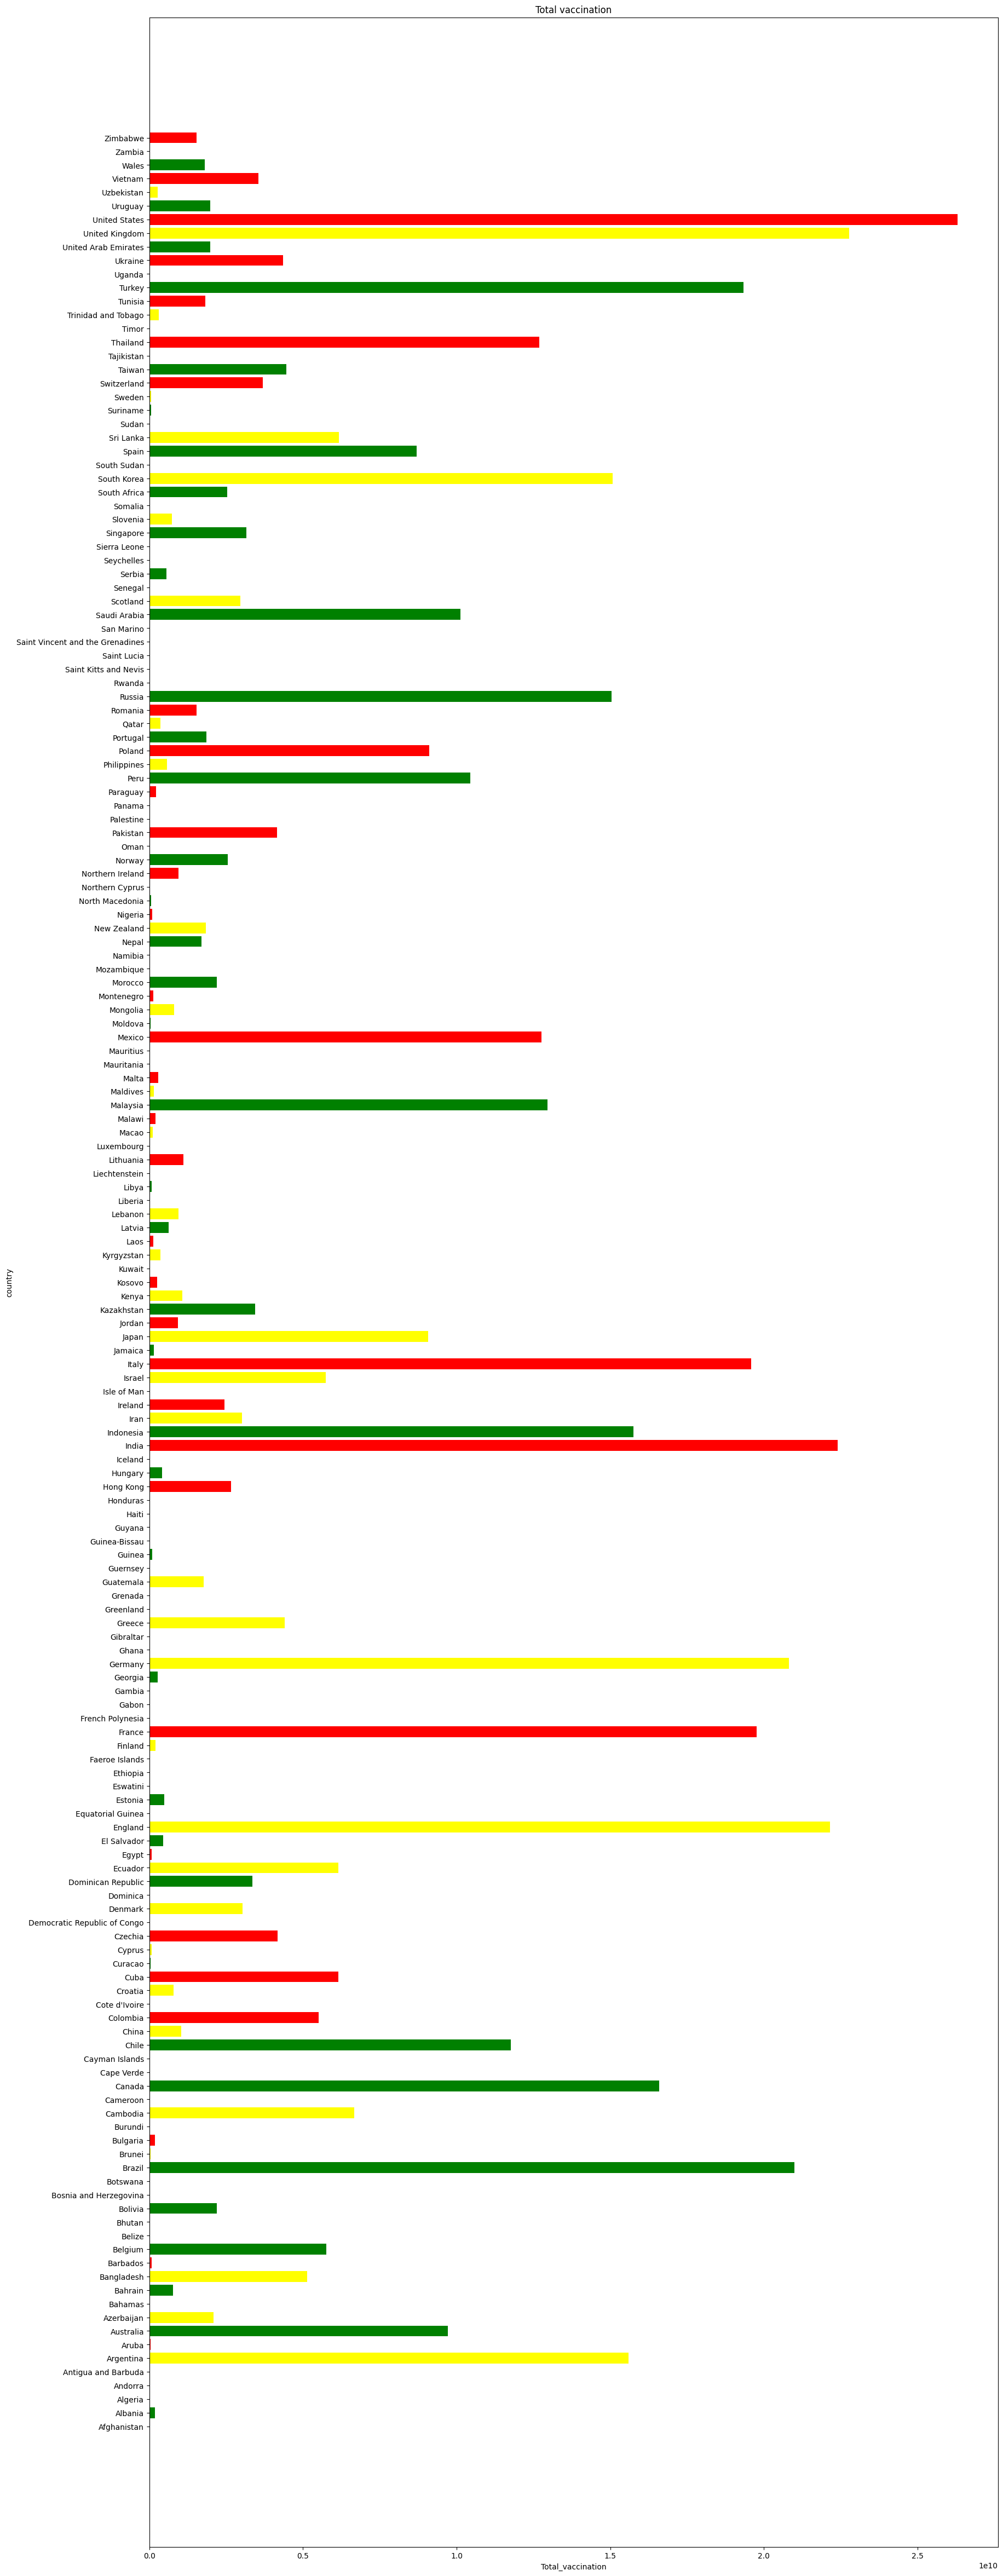

In [ ]:
x=new_data["country"]
y=new_data["total_vaccinations"]
plt.figure(figsize=(20,60))
plt.title("Total vaccination")
plt.ylabel("country")
plt.xlabel("Total_vaccination")
plt.barh(x,y,color=["red",'green','yellow'])
plt.show()

correlation of new data

Axes(0.125,0.11;0.62x0.77)


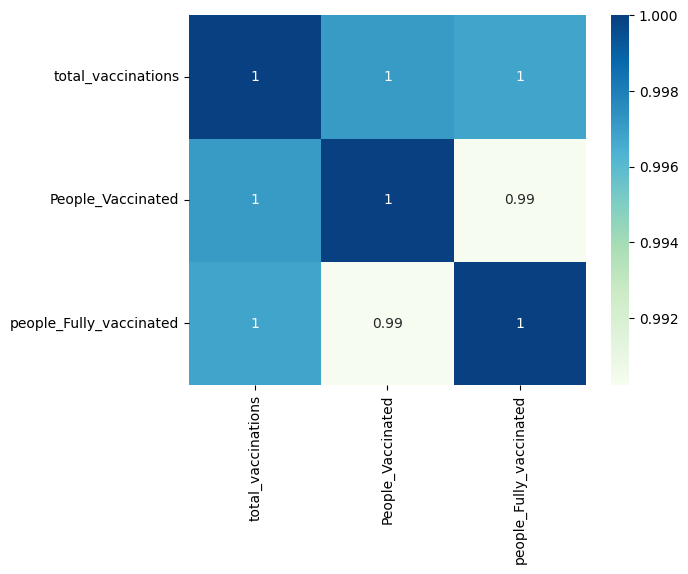

In [ ]:
print(sns.heatmap(new_data.corr(),cmap='GnBu',annot=True))

<Figure size 2000x2000 with 0 Axes>

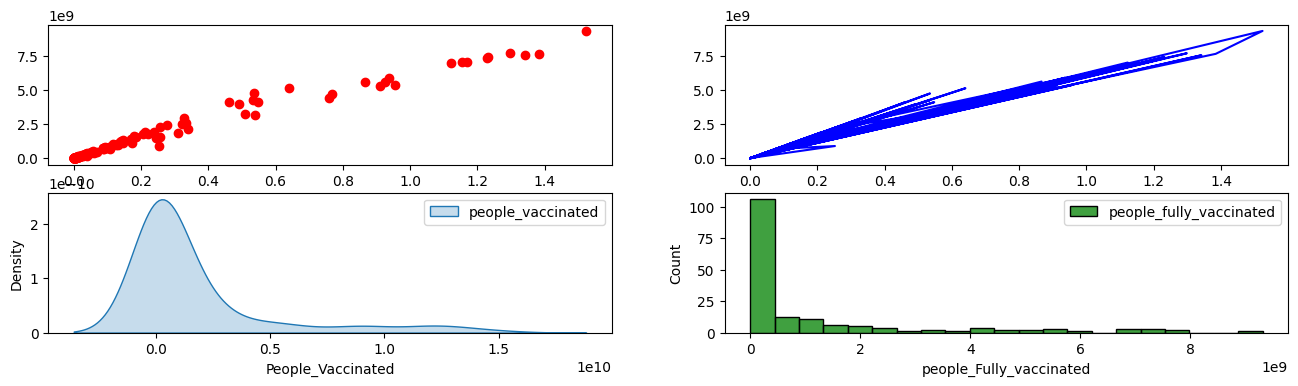

In [ ]:
plt.figure(figsize=(20,20))
x1=new_data["People_Vaccinated"]
y1=new_data["people_Fully_vaccinated"]
plt.figure(figsize=(16,4))
plt.subplot(2,2,1)
plt.scatter(x1,y1,color="red")
plt.subplot(2,2,2)
plt.plot(x1,y1,color='blue')
plt.subplot(2,2,3)
sns.kdeplot(x1,shade=True,label="people_vaccinated",fill=None)
plt.legend()
plt.subplot(2,2,4)
sns.histplot(y1,color='green',label='people_fully_vaccinated')
plt.legend()
plt.show()

according to the covid vaccinations data each and every
day different type vaccines used in each every country

In [ ]:
len(data.vaccines.unique())

74

74 groups used all over the countries according to the data , that groups are

In [ ]:
data.vaccines.unique()

array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik Light, Sputnik V',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech,

vaccines groups used countrys and its total vaccination dataframe

In [ ]:
vac5=[]
for x in data["vaccines"].unique():
     z=data.loc[data["vaccines"]== x]
     vac1=[]
     for y in z["country"]:
      vac1.append(y)
     vac5.append(vac1)
t=[]
for i in vac5:
  dat=[]
  dat=list(dict.fromkeys(i))
  t.append(dat)
vac5=t
cot=[]
for j in vac5:
  cot.append(len(j))
total_vac_for_vaccines=[]
for x in data["vaccines"].unique():
     z=data.loc[data["vaccines"]== x]
     total=0
     total=z["total_vaccinations"].sum()
     total_vac_for_vaccines.append(total)
new_vac_data=pd.DataFrame({"vaccines":data['vaccines'].unique(),"countries name":vac5,"No_of_countries":cot,"total_vaccinations":total_vac_for_vaccines})
new_vac_data

,vaccines,countries name,No_of_countries,total_vaccinations
0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...","[Afghanistan, Belize, Cameroon, Namibia, Trini...",5,3.356344e+08
1,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...","[Albania, Azerbaijan, Bosnia and Herzegovina, ...",4,2.263555e+09
2,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...","[Algeria, Zimbabwe]",2,1.558509e+09
3,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","[Andorra, Australia, England, Finland, Guernse...",12,6.971054e+10
4,"Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V",[Antigua and Barbuda],1,6.160890e+05
...,...,...,...,...
69,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Thailand],1,1.269902e+10
70,"Pfizer/BioNTech, Sinovac, Turkovac",[Turkey],1,1.934375e+10
71,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",[United Arab Emirates],1,1.973593e+09
72,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",[Uzbekistan],1,2.648153e+08


visulaize data we find

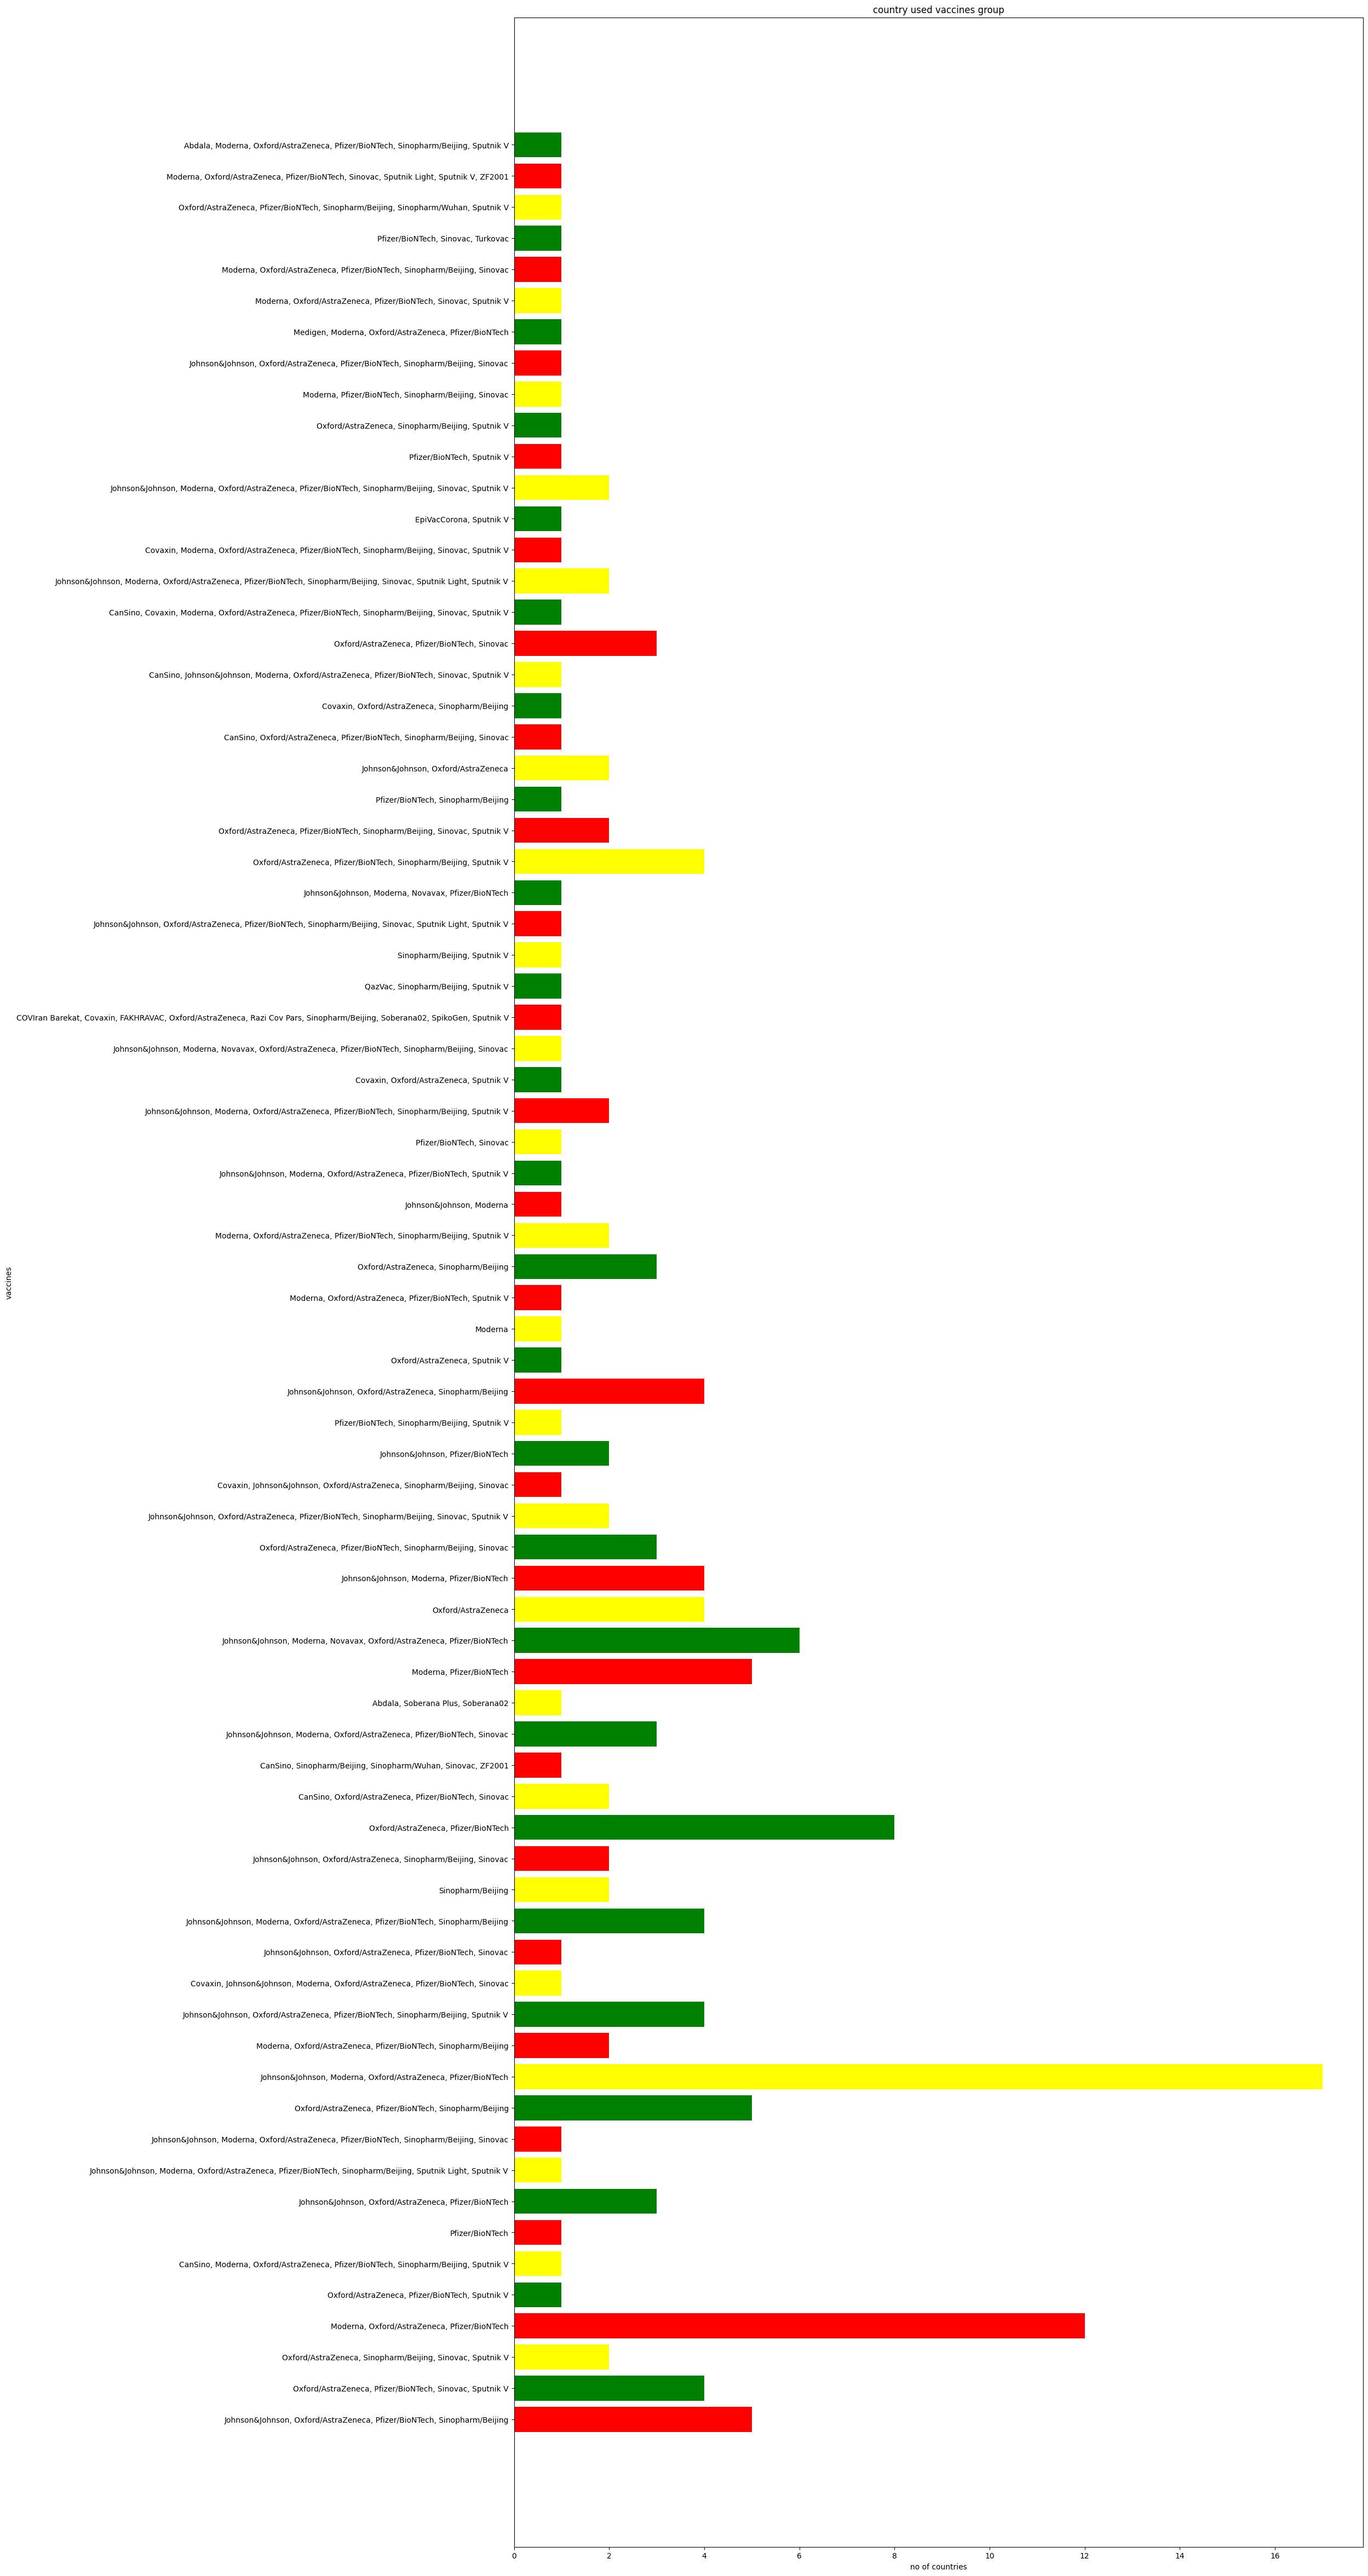

In [ ]:
x=new_vac_data["vaccines"]
y=new_vac_data["No_of_countries"]
plt.figure(figsize=(20,60))
plt.title("country used vaccines group")
plt.ylabel("vaccines")
plt.xlabel("no of countries")
plt.barh(x,y,color=["red",'green','yellow'])
plt.show()

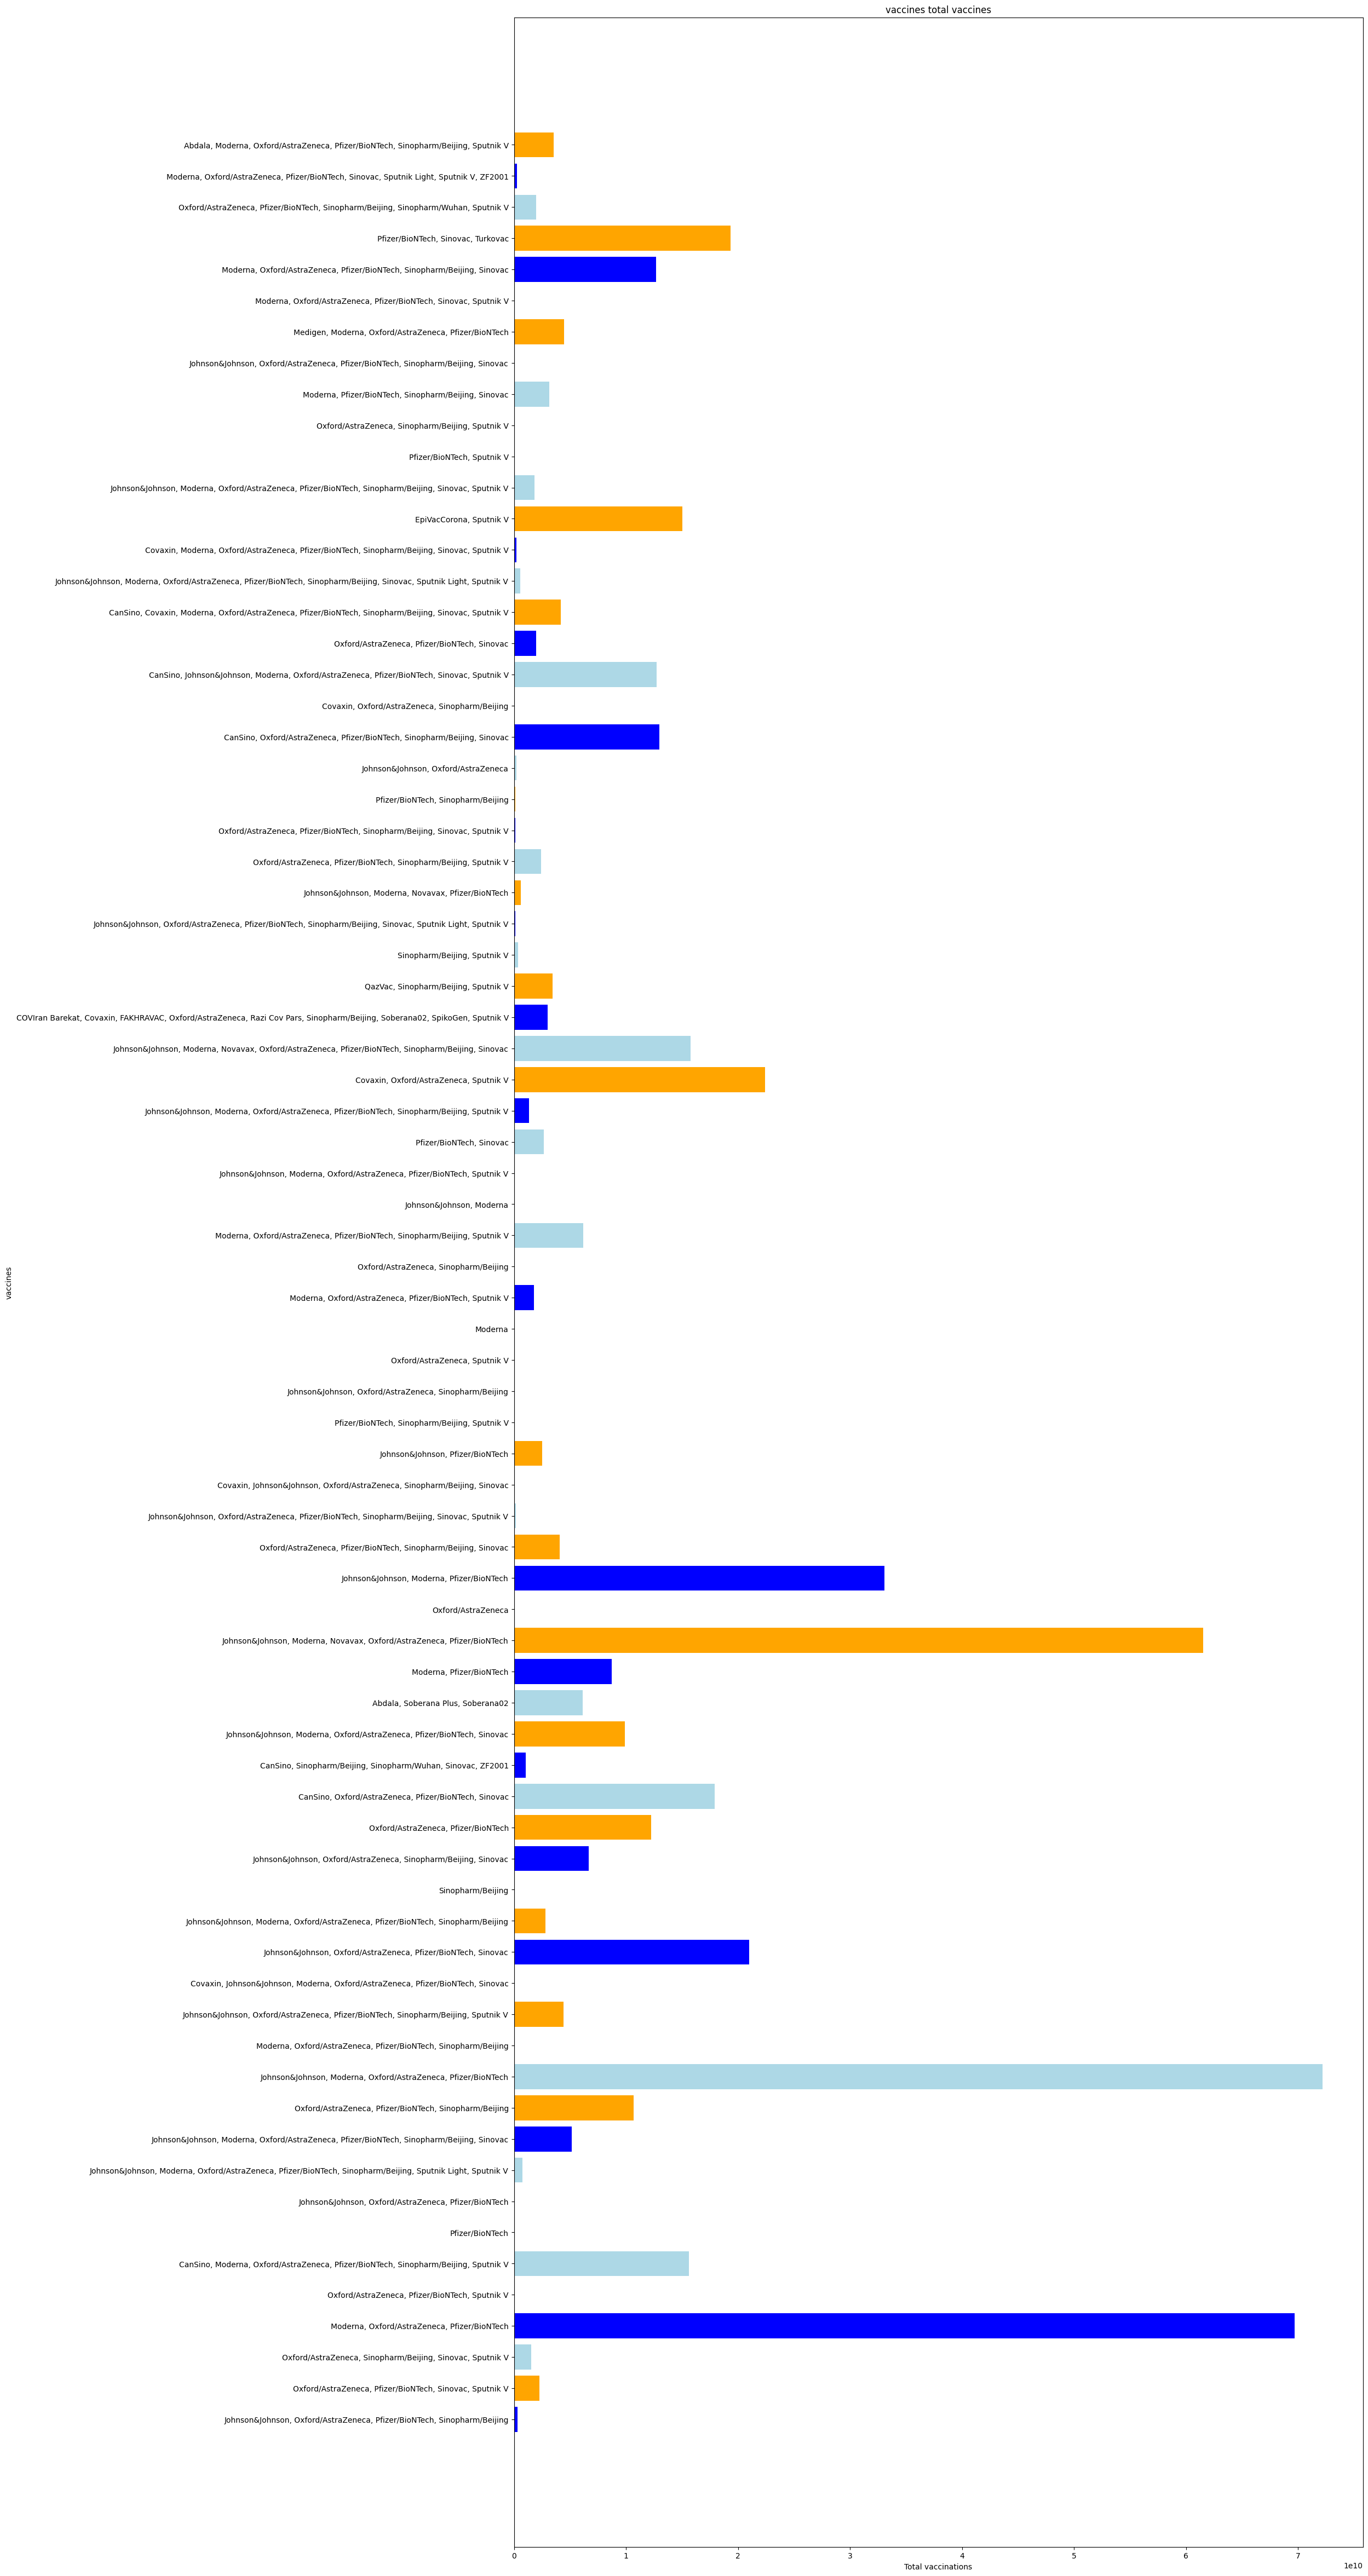

In [ ]:
x=new_vac_data["vaccines"]
y=new_vac_data["total_vaccinations"]
plt.figure(figsize=(20,60))
plt.title("vaccines total vaccines")
plt.ylabel("vaccines")
plt.xlabel("Total vaccinations")
plt.barh(x,y,color=["blue",'orange','lightblue'])
plt.show()

Model for total vaccinationation

using the pycaret libraray we can machine learning flow very

In [ ]:
#intialize the setup
clf = setup(data, target = 'total_vaccinations')

,Description,Value
0,Session id,8044
1,Target,total_vaccinations
2,Target type,Regression
3,Original data shape,"(30847, 15)"
4,Transformed data shape,"(30847, 15)"
5,Transformed train set shape,"(21592, 15)"
6,Transformed test set shape,"(9255, 15)"
7,Numeric features,8
8,Categorical features,6
9,Preprocess,True


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,34772.5531,30093956822.8057,167308.0459,0.9999,0.0233,0.0087,6.3230
rf,Random Forest Regressor,70938.8160,73284876901.4159,264280.2978,0.9998,0.0301,0.0137,18.7690
xgboost,Extreme Gradient Boosting,132281.3086,104316435660.8000,321666.4406,0.9998,0.1913,0.1045,0.9470
lightgbm,Light Gradient Boosting Machine,157837.0489,119169343438.7185,343502.4789,0.9997,0.2754,0.7315,1.4210
dt,Decision Tree Regressor,107096.0221,155069404490.0160,389957.1245,0.9997,0.0395,0.0193,0.7190
gbr,Gradient Boosting Regressor,354064.4543,495666853929.7382,702623.7818,0.9990,0.3990,1.9529,6.6070
knn,K Neighbors Regressor,361173.8219,621501792256.0000,783803.4312,0.9987,0.3773,0.5456,0.3310
br,Bayesian Ridge,740080.8325,1813007096117.8645,1345505.2493,0.9962,0.7475,5.8196,0.3780
en,Elastic Net,739737.8856,1813090242894.5083,1345533.6320,0.9962,0.7459,5.8763,0.5010
ridge,Ridge Regression,740143.1821,1813004270814.4167,1345504.6313,0.9962,0.7458,5.8100,0.4130


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=8044)

Extra treeRegressor is a good model

In [ ]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28590.6823,10618009216.5881,103043.7248,1.0000,0.0169,0.0039
1,38121.5512,35629795387.5156,188758.5637,0.9999,0.0156,0.0042
2,40983.6894,33394630073.9686,182741.9768,0.9999,0.0943,0.0502
3,38205.5264,55637232988.2034,235875.4608,0.9999,0.0165,0.0042
4,38098.5658,62439330026.4896,249878.6306,0.9999,0.0155,0.0044
5,30706.7425,13190680085.4951,114850.6860,1.0000,0.0207,0.0047
6,36566.2427,24537024759.5040,156642.9850,0.9999,0.0157,0.0045
7,31003.8809,17526660572.4753,132388.2947,1.0000,0.0114,0.0039
8,31822.9849,20484489509.9850,143124.0354,1.0000,0.0119,0.0038


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
finalize_model(model)

In [ ]:
save_model(model, 'et')

Daily vaccination Trend

In [ ]:
country_vaccine_time = data[["country", "date",
                               'daily_vaccinations'
                               ]]
country_vaccine_time.columns = ["Country", "Date",
                               "Daily vaccinations"
                               ]
countries = ['India','Germany',
              'United Kingdom', 'United States', 'China', 'Brazil', 'Indonesia','Japan','Pakistan', 'Bangladesh']
fig = px.line(country_vaccine_time, x="Date", y="Daily vaccinations", color='Country')
fig.show()

**Load the covid vacciantion by manufactures**

In [ ]:
data_manu=pd.read_csv("/content/drive/MyDrive/country_vaccinations_by_manufacturer.csv")
print(data_manu.shape)
data_manu.head(5)

preprocessing the dataset

handle the missing values

In [ ]:
data_manu.info()
print(data_manu.isnull().sum())

there is no misssing values in columns

Outlierhandling


Finding outlier

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data_manu["total_vaccinations"],orient='h')
plt.show()
col=data_manu["total_vaccinations"]
q1=col.quantile(0.25)
q3=col.quantile(0.75)
iqr=q3-q1
lower=q1 - 1.5 *iqr
upper=q3 + 1.5*iqr
length=len(col[(col<lower) | (col>upper)])
print(f"Outlier on  total_vaccinations    is {length}")

outlier handled

In [ ]:
col[col<lower]=lower
col[col>upper]=upper
length=len(col[(col<lower) | (col>upper)])
print(f"Outlier on  total_vaccinations    is {length}")

After handling the outliers both dataset boxplot

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data_manu,orient='h')
plt.show()

statiscal analysis

on the manufactururas data we can only have total vaccination in the countries on day by day

In [ ]:
data_manu.describe()

perform EDA on manufactures dataset

Calculate the Total vaccination on date wise

In [ ]:
total_vac=[]
for x in data_manu["location"].unique():
     z=data_manu.loc[data_manu["location"]== x]
     total=0
     total=z["total_vaccinations"].sum()
     total_vac.append(total)


create new dataframe for for the country data



In [ ]:
df=pd.DataFrame({'location':data_manu["location"].unique(),'total_vaccinations':total_vac})
df.head()

Country wise vaccination

In [ ]:
x=data_manu["location"].unique()
y=total_vac
plt.figure(figsize=(10,10))
plt.title("Total vaccination")
plt.ylabel("Locatoion")
plt.xlabel("Total_vaccination")
plt.barh(x,y,color=["red",'green','yellow'])
plt.show()

In [ ]:
len(data_manu["vaccine"].unique())


On the vaccinations there are 10 type of vaccines used in the all over world according to the manufacturer data

That vaccines

In [ ]:
vaccines =data_manu["vaccine"].unique()
vaccines

create a dataframe that contain each and every country and used vaccines

In [ ]:
vac=[]
for x in data_manu["location"].unique():
     z=data_manu.loc[data_manu["location"]== x]
     vac1=[]
     for y in z["vaccine"]:
      vac1.append(y)
     vac.append(vac1)
vac_dataframe=pd.DataFrame({"country":data_manu["location"].unique(),"vaccines":vac})
#remove duplicates
dt=[]
for i in vac_dataframe["vaccines"]:
  dat=[]
  dat=list(dict.fromkeys(i))
  dt.append(dat)
vac_dataframe["vaccines"]=dt
vac_dataframe.head()


Find the number of countries per vaccine used

In [ ]:
count=[]
for i in data_manu["vaccine"].unique():
  a=0
  for j in vac_dataframe["vaccines"]:
    for k in j:
      if i == k:
        a=a+1
  count.append(a)
new_vac=pd.DataFrame({"vaccine":data_manu["vaccine"].unique(),"No fo country":count})
print(new_vac)
plt.figure(figsize=(10,10))
x=data_manu["vaccine"].unique()
y=count
sns.barplot(x=y,y=x,orient='h')
plt.show()